In [ ]:
#Core Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
#Machine Learning Libraries
from sklearn.model_selection import train_test_split
#Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras 

In [ ]:
#Generating Data
n = 1000000
data = np.zeros((n,160))

In [ ]:
samplingFrequency   = 256;
samplingInterval       = 1 / samplingFrequency;
beginTime           = 0;
endTime             = 1;
#tpCount     = len(amplitude)
#values      = np.arange(int(tpCount/2))
#timePeriod  = tpCount/samplingFrequency
#frequencies = values/timePeriod
time        = np.arange(beginTime, endTime, samplingInterval);
for i in range (n): 
    signal1Frequency     = 80*random.random()+20;
    amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
    amplitude = amplitude1
    fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
    fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
    FID=[]
    for j in range (32):
        r = random.randint(0,7)
        FID.append(amplitude[8*j+r])
    data[i,0:32] = FID
    data[i,32:160] = abs(fourierTransform)

In [ ]:
Data = pd.DataFrame(data)
Data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
0,-0.154793,-0.910046,0.754440,0.846948,-0.985239,0.976652,-0.469298,0.668812,-0.895774,-0.337316,-0.033221,0.419621,0.652113,0.526901,-0.960231,-0.066673,0.966134,-0.635299,0.796524,-0.295121,0.066406,-0.241957,-0.652317,-0.419377,0.987103,-0.996552,0.895654,-0.669011,0.822621,0.957106,0.021971,0.209589,0.002817,0.002818,0.002822,0.002829,0.002838,0.002849,0.002864,0.002881,...,0.007233,0.007022,0.006828,0.006649,0.006483,0.006329,0.006186,0.006054,0.005930,0.005815,0.005708,0.005608,0.005514,0.005427,0.005345,0.005269,0.005197,0.005131,0.005068,0.005010,0.004956,0.004905,0.004858,0.004815,0.004774,0.004737,0.004702,0.004670,0.004641,0.004615,0.004591,0.004570,0.004551,0.004534,0.004520,0.004508,0.004498,0.004491,0.004485,0.004482
1,0.373263,-0.817070,0.942145,0.447461,-0.296594,0.564853,0.348580,0.671762,-0.162081,-0.294689,0.449243,0.750251,0.999089,0.371412,-0.959690,0.818218,-0.245648,0.860227,0.999868,-0.474487,0.965765,-0.350449,0.160113,0.628528,0.292782,0.931500,-0.999002,0.499346,0.186180,-0.957991,-0.058886,-0.859209,0.001547,0.001547,0.001548,0.001550,0.001552,0.001555,0.001559,0.001563,...,0.002163,0.002046,0.001940,0.001844,0.001756,0.001675,0.001601,0.001532,0.001469,0.001410,0.001356,0.001306,0.001259,0.001215,0.001175,0.001137,0.001101,0.001068,0.001037,0.001008,0.000981,0.000956,0.000933,0.000911,0.000891,0.000872,0.000855,0.000839,0.000825,0.000812,0.000800,0.000789,0.000779,0.000771,0.000764,0.000758,0.000753,0.000749,0.000746,0.000745
2,0.000000,-0.762704,0.915458,0.966448,0.775227,0.247384,0.998801,-0.228356,0.357112,-0.594863,0.997808,0.871715,-0.929656,-0.498528,0.970732,-0.950425,-0.773741,-0.986935,-0.151441,0.960580,0.002350,-0.961876,-0.431258,-0.637437,-0.112605,0.448850,-0.982731,-0.788899,-0.226068,-0.073597,-0.938330,-0.713037,0.000700,0.000700,0.000700,0.000700,0.000701,0.000701,0.000702,0.000703,...,0.002910,0.003163,0.003473,0.003859,0.004356,0.005018,0.005947,0.007344,0.009688,0.014437,0.029221,0.497074,0.025291,0.012742,0.008405,0.006204,0.004872,0.003977,0.003334,0.002848,0.002468,0.002162,0.001909,0.001697,0.001516,0.001360,0.001222,0.001101,0.000993,0.000896,0.000809,0.000729,0.000657,0.000592,0.000534,0.000483,0.000438,0.000402,0.000374,0.000357
3,-0.955608,0.207581,0.178985,-0.075332,0.133300,-0.998150,0.336124,-0.800973,0.058261,-0.610309,-0.997346,-0.761453,0.926227,0.924303,0.994801,0.951993,0.573026,-0.167129,0.966929,-0.942667,0.247680,-0.503657,0.410749,-0.313356,-0.275810,0.837278,0.957091,-0.921622,-0.183974,-0.452469,0.976202,0.909921,0.000426,0.000426,0.000427,0.000427,0.000427,0.000428,0.000428,0.000429,...,0.004719,0.006228,0.009219,0.017981,0.498997,0.019099,0.009305,0.006123,0.004547,0.003607,0.002983,0.002539,0.002206,0.001949,0.001743,0.001576,0.001437,0.001320,0.001220,0.001134,0.001060,0.000995,0.000937,0.000887,0.000842,0.000802,0.000767,0.000735,0.000707,0.000682,0.000660,0.000641,0.000624,0.000609,0.000597,0.000586,0.000578,0.000571,0.000567,0.000564
4,0.520162,-0.430859,0.395294,0.140190,0.163401,-0.999970,0.995603,-0.023482,-0.499964,-0.998903,-0.987802,0.924647,0.982474,-0.845797,-0.155591,0.054601,0.912236,-0.344550,0.892110,0.513389,-0.109290,-0.819960,-0.970770,0.953948,0.171202,0.854133,-0.979402,-0.628820,-0.819816,-0.307392,-0.109040,-0.597979,0.010178,0.010195,0.010246,0.010332,0.010454,0.010616,0.010819,0.011067,...,0.002566,0.002539,0.002513,0.002488,0.002464,0.002441,0.002420,0.002399,0.002379,0.002360,0.002342,0.002325,0.002308,0.002293,0.002278,0.002264,0.002250,0.002237,0.002225,0.002214,0.002203,0.002193,0.002183,0.002174,0.002166,0.002158,0.002150,0.002144,0.002137,0.002132,0.002126,0.002122,0.002118,0.002114,0.002111,0.002108,0.002106,0.002104,0.002103,0.002102


In [ ]:
# Shape of the dataset
print(f'Our dataset has {Data.shape[0]} rows and {Data.shape[1]} columns.')
print(70*'-')
print(f'The number of features is {Data.shape[1]}.')

Our dataset has 1000000 rows and 160 columns.
----------------------------------------------------------------------
The number of features is 160.


In [ ]:
#saving data
#Data.to_csv(r'C:\Users\PC\Desktop\Data.csv')

In [ ]:
#Splitting dataset into X and Y
X=Data.iloc[:,0:32]
Y=Data.iloc[:,32:]
print(f'The shape of our input is : {X.shape}')
print(70*'-')
print(f'The shape of our output is : {Y.shape}')

The shape of our input is : (1000000, 32)
----------------------------------------------------------------------
The shape of our output is : (1000000, 128)


In [ ]:
#split data into train-test set (67% training and 33% testing data)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
print(f'The shape of X_train is : {X_train.shape}')
print(70*'-')
print(f'The shape of X_test is : {X_test.shape}')
print(70*'-')
print(f'The shape of Y_train is : {Y_train.shape}')
print(70*'-')
print(f'The shape of Y_test set is : {Y_test.shape}')


The shape of X_train is : (670000, 32)
----------------------------------------------------------------------
The shape of X_test is : (330000, 32)
----------------------------------------------------------------------
The shape of Y_train is : (670000, 128)
----------------------------------------------------------------------
The shape of Y_test set is : (330000, 128)


In [ ]:
#Applying simple neural network (5 layers- adam optimizer)
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(128,activation='linear')
])


model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='acc'
)


history=model.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
6700/6700 [==============================] - 66s 10ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0123
Epoch 2/50
6700/6700 [==============================] - 64s 10ms/step - loss: 0.0018 - acc: 0.0124 - val_loss: 0.0018 - val_acc: 0.0126
Epoch 3/50
6700/6700 [==============================] - 63s 9ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 4/50
6700/6700 [==============================] - 62s 9ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 5/50
6700/6700 [==============================] - 61s 9ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0128
Epoch 6/50
6700/6700 [==============================] - 62s 9ms/step - loss: 0.0018 - acc: 0.0124 - val_loss: 0.0018 - val_acc: 0.0124
Epoch 7/50
6700/6700 [==============================] - 61s 9ms/step - loss: 0.0018 - acc: 0.0124 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 8/50
6700/6700 [==============================]

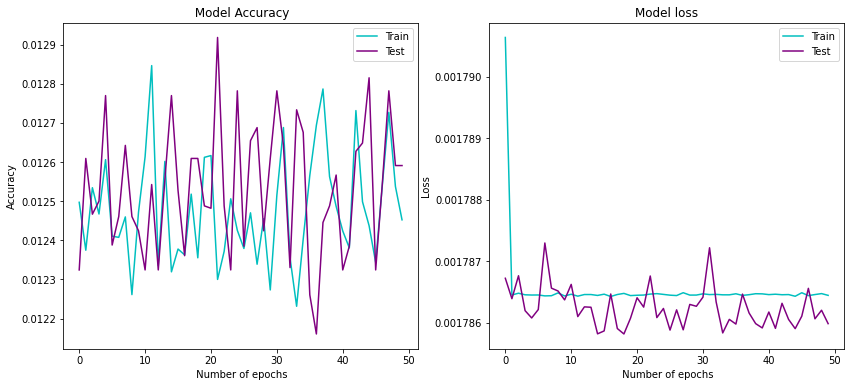

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = ' Model Accuracy', ylabel= 'Accuracy',xlabel=' Number of epochs')
plt.plot(history.history['acc'],color='c')
plt.plot(history.history['val_acc'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel=' Number of epochs')
plt.plot(history.history['loss'],color='c')
plt.plot(history.history['val_loss'],color='purple')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
#Applying simple neural network (5 layers, SGD, learning rate : 0.1)
model_1=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(128,activation='linear')
])


model_1.compile(
    keras.optimizers.SGD(lr=0.1),
    loss='mean_squared_error',
    metrics='acc'
)


history_1=model_1.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
6700/6700 [==============================] - 67s 10ms/step - loss: 0.0024 - acc: 0.0115 - val_loss: 0.0018 - val_acc: 0.0127
Epoch 2/50
6700/6700 [==============================] - 66s 10ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0123
Epoch 3/50
6700/6700 [==============================] - 70s 10ms/step - loss: 0.0018 - acc: 0.0128 - val_loss: 0.0018 - val_acc: 0.0127
Epoch 4/50
6700/6700 [==============================] - 68s 10ms/step - loss: 0.0018 - acc: 0.0127 - val_loss: 0.0018 - val_acc: 0.0127
Epoch 5/50
6700/6700 [==============================] - 65s 10ms/step - loss: 0.0018 - acc: 0.0127 - val_loss: 0.0018 - val_acc: 0.0128
Epoch 6/50
6700/6700 [==============================] - 68s 10ms/step - loss: 0.0018 - acc: 0.0127 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 7/50
6700/6700 [==============================] - 69s 10ms/step - loss: 0.0018 - acc: 0.0128 - val_loss: 0.0018 - val_acc: 0.0126
Epoch 8/50
6700/6700 [==========================

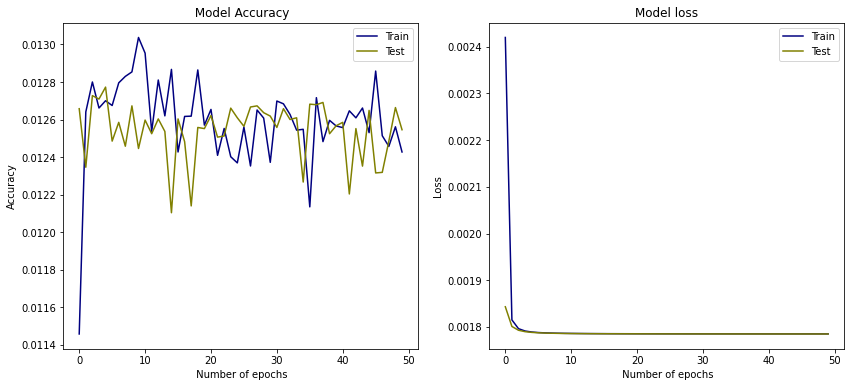

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = ' Model Accuracy', ylabel= 'Accuracy',xlabel=' Number of epochs')
plt.plot(history_1.history['acc'],color='navy')
plt.plot(history_1.history['val_acc'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel=' Number of epochs')
plt.plot(history_1.history['loss'],color='navy')
plt.plot(history_1.history['val_loss'],color='olive')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
#Applying simple neural network (5 layers, SGD, learning rate : 1)
model_2=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(128,activation='linear')
])


model_2.compile(
    keras.optimizers.SGD(lr=1),
    loss='mean_squared_error',
    metrics='acc'
)


history_2=model_2.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
6700/6700 [==============================] - 19s 3ms/step - loss: 0.0019 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0122
Epoch 2/50
6700/6700 [==============================] - 17s 2ms/step - loss: 0.0018 - acc: 0.0127 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 3/50
6700/6700 [==============================] - 18s 3ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 4/50
6700/6700 [==============================] - 17s 2ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0124
Epoch 5/50
6700/6700 [==============================] - 18s 3ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0126
Epoch 6/50
6700/6700 [==============================] - 17s 3ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0125
Epoch 7/50
6700/6700 [==============================] - 18s 3ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0124
Epoch 8/50
6700/6700 [==============================] -

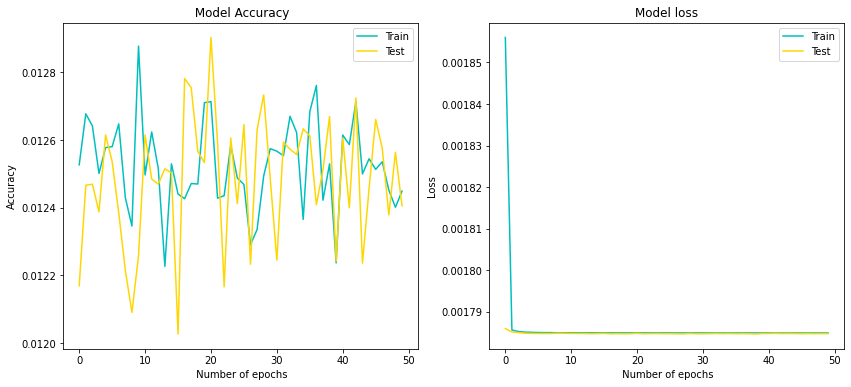

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = ' Model Accuracy', ylabel= 'Accuracy',xlabel=' Number of epochs')
plt.plot(history_2.history['acc'],color='c')
plt.plot(history_2.history['val_acc'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel=' Number of epochs')
plt.plot(history_2.history['loss'],color='c')
plt.plot(history_2.history['val_loss'],color='gold')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
#Applying simple neural network (5 layers, SGD, learning rate : 0.01)
model_3=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(128,activation='linear')
])


model_3.compile(
    keras.optimizers.SGD(lr=0.01),
    loss='mean_squared_error',
    metrics='acc'
)


history_3=model_3.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
6700/6700 [==============================] - 17s 3ms/step - loss: 0.0049 - acc: 0.0081 - val_loss: 0.0033 - val_acc: 0.0095
Epoch 2/50
6700/6700 [==============================] - 18s 3ms/step - loss: 0.0029 - acc: 0.0099 - val_loss: 0.0026 - val_acc: 0.0103
Epoch 3/50
6700/6700 [==============================] - 18s 3ms/step - loss: 0.0024 - acc: 0.0106 - val_loss: 0.0022 - val_acc: 0.0110
Epoch 4/50
6700/6700 [==============================] - 17s 2ms/step - loss: 0.0021 - acc: 0.0114 - val_loss: 0.0021 - val_acc: 0.0115
Epoch 5/50
6700/6700 [==============================] - 17s 2ms/step - loss: 0.0020 - acc: 0.0120 - val_loss: 0.0020 - val_acc: 0.0122
Epoch 6/50
6700/6700 [==============================] - 17s 3ms/step - loss: 0.0019 - acc: 0.0122 - val_loss: 0.0019 - val_acc: 0.0124
Epoch 7/50
6700/6700 [==============================] - 18s 3ms/step - loss: 0.0019 - acc: 0.0123 - val_loss: 0.0019 - val_acc: 0.0127
Epoch 8/50
6700/6700 [==============================] -

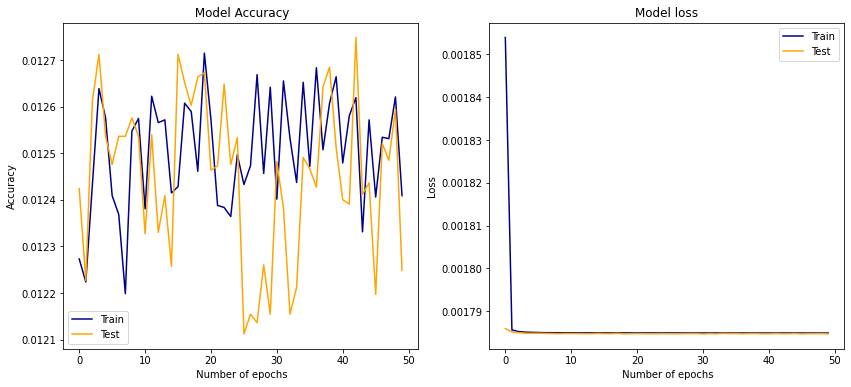

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = ' Model Accuracy', ylabel= 'Accuracy',xlabel=' Number of epochs')
plt.plot(history_2.history['acc'],color='darkblue')
plt.plot(history_2.history['val_acc'],color='orange')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel=' Number of epochs')
plt.plot(history_2.history['loss'],color='darkblue')
plt.plot(history_2.history['val_loss'],color='orange')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
'''
Y_predicted = model_3.predict(X_test)
plt.plot(Y_test, label = 'Real Data')
plt.plot(Y_predicted, label = 'Predicted values')
plt.legend(loc='best')
plt.show()
'''

"\nY_predicted = model_3.predict(X_test)\nplt.plot(Y_test, label = 'Real Data')\nplt.plot(Y_predicted, label = 'Predicted values')\nplt.legend(loc='best')\nplt.show()\n"

In [ ]:
#Applying simple neural network (5 layers,rmsprop optimizer)
model_4=keras.Sequential([
                        keras.layers.Flatten(input_shape=(32,)),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(384,activation='relu'),
                        keras.layers.Dense(256,activation='relu'),
                        keras.layers.Dense(128,activation='linear')
])


model_4.compile(
    optimizer='rmsprop',
    loss='mean_squared_error',
    metrics='acc'
)


history_4=model_4.fit(
    X_train,Y_train,epochs=50,batch_size=100,validation_data=(X_test,Y_test)
)

Epoch 1/50
6700/6700 [==============================] - 23s 3ms/step - loss: 0.0018 - acc: 0.0124 - val_loss: 0.0018 - val_acc: 0.0121
Epoch 2/50
6700/6700 [==============================] - 21s 3ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0128
Epoch 3/50
6700/6700 [==============================] - 21s 3ms/step - loss: 0.0018 - acc: 0.0122 - val_loss: 0.0018 - val_acc: 0.0122
Epoch 4/50
6700/6700 [==============================] - 21s 3ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0124
Epoch 5/50
6700/6700 [==============================] - 19s 3ms/step - loss: 0.0018 - acc: 0.0125 - val_loss: 0.0018 - val_acc: 0.0121
Epoch 6/50
6700/6700 [==============================] - 19s 3ms/step - loss: 0.0018 - acc: 0.0126 - val_loss: 0.0018 - val_acc: 0.0124
Epoch 7/50
6700/6700 [==============================] - 21s 3ms/step - loss: 0.0018 - acc: 0.0122 - val_loss: 0.0018 - val_acc: 0.0122
Epoch 8/50
6700/6700 [==============================] -

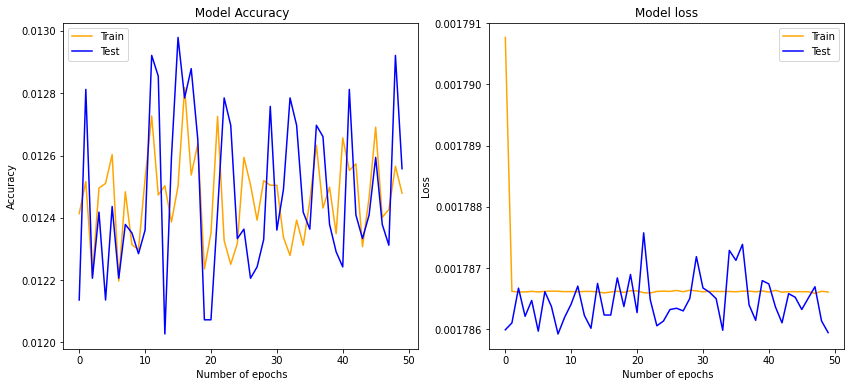

In [ ]:
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = ' Model Accuracy', ylabel= 'Accuracy',xlabel=' Number of epochs')
plt.plot(history_4.history['acc'],color='orange')
plt.plot(history_4.history['val_acc'],color='b')
plt.legend(['Train', 'Test'], loc='best')
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss',xlabel=' Number of epochs')
plt.plot(history_4.history['loss'],color='orange')
plt.plot(history_4.history['val_loss'],color='b')
plt.legend(['Train', 'Test'], loc='best')
plt.show()